In [8]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.cluster import KMeans
import os
from sklearn.cluster import KMeans
#ler os logs
d1 = pd.read_csv('/content/logs.log',header=None,names=['C1','C2'])

In [9]:
#filtrar os dados:
d1['IP_Address']=d1.C1.apply( lambda x: pd.Series(str(x).split(" ")))[0]
d1['Time']=d1.C1.apply( lambda x: pd.Series(str(x).split(" ")))[3]
d1['Time']=d1.Time.apply( lambda x: pd.Series(str(x).split("[")))[1]
d1['Method']=d1.C1.apply( lambda x: pd.Series(str(x).split(" ")))[5]
d1['Method']=d1.Method.apply( lambda x: pd.Series(str(x).split('\"')))[1]
d1['Resource']=d1.C1.apply( lambda x: pd.Series(str(x).split(" ")))[6]
d1['Protocol']=d1.C1.apply( lambda x: pd.Series(str(x).split(" ")))[7]
d1['Protocol']=d1.Protocol.apply( lambda x: pd.Series(str(x).split('\"')))[0]
d1['Status']=d1.C1.apply( lambda x: pd.Series(str(x).split(" ")))[8]
#padronizacao dos dados
dataset=d1.drop(labels=['C1','C2'],axis=1)
print(d1)

                                                     C1  \
0     192.168.2.30 - - [20/Nov/2023:08:18:00 -0500] ...   
1     192.168.2.30 - - [20/Nov/2023:08:18:00 -0500] ...   
2     192.168.2.30 - - [20/Nov/2023:08:18:00 -0500] ...   
3     192.168.2.30 - - [20/Nov/2023:08:18:00 -0500] ...   
4     192.168.2.30 - - [20/Nov/2023:08:18:00 -0500] ...   
...                                                 ...   
1820  192.168.2.15 - - [20/Nov/2023:08:18:01 -0500] ...   
1821  192.168.2.15 - - [20/Nov/2023:08:18:01 -0500] ...   
1822  192.168.2.15 - - [20/Nov/2023:08:18:01 -0500] ...   
1823  192.168.2.15 - - [20/Nov/2023:08:18:01 -0500] ...   
1824  192.168.2.15 - - [20/Nov/2023:08:18:01 -0500] ...   

                                               C2    IP_Address  \
0      like Gecko) Chrome/4.0.219.6 Safari/532.1"  192.168.2.30   
1                                             NaN  192.168.2.30   
2                                             NaN  192.168.2.30   
3                      

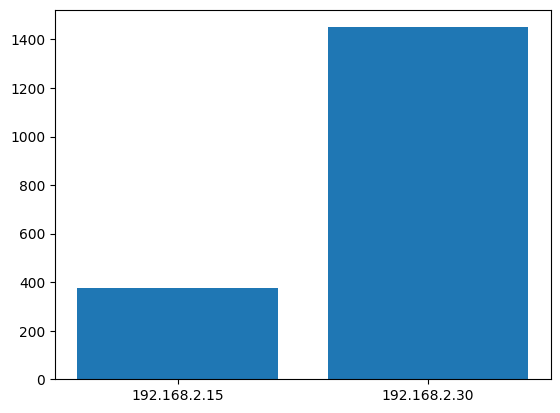

In [10]:
# Encontrar índices onde 'Method' é igual a '-'
indexNames = dataset[dataset['Method'] == '-'].index

# Excluir essas linhas do DataFrame
dataset.drop(indexNames, inplace=True)

# Em seguida, remover as colunas 'Time', 'Resource' e 'Protocol'
dataset = dataset.drop(labels=['Time', 'Resource', 'Protocol'], axis=1)

# Agora, agrupar os dados e criar o gráfico de barras
grouped_data = dataset.groupby(['IP_Address', 'Method', 'Status']).size().reset_index(name="access_counts")

# Plotar o gráfico de barras
plt.bar(grouped_data.IP_Address, grouped_data.access_counts, tick_label=grouped_data.IP_Address, width=0.8)
plt.show()


In [11]:

# Convertendo o endereço IP para valores numéricos
label_encoder = LabelEncoder()
grouped_data['IP_Address'] = label_encoder.fit_transform(grouped_data['IP_Address'])

# padronizacao dos dados
train_data = grouped_data.drop(labels=['Method','Status'], axis=1)
sc = StandardScaler()
train_data = sc.fit_transform(train_data)


# #Using Elbow method for optimum K value for K-Means Clustering
# distortions = []
# K = range(1,5)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(train_data)
#     kmeanModel.fit(train_data)
#     distortions.append(sum(np.min(cdist(train_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / train_data.shape[0])
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


# K-Means Clustering model
# Criando o modelo
seed = 42
model = KMeans(n_clusters=2, random_state=seed)

# Fit and Predict
pred = model.fit_predict(train_data)

# Adicionando rótulos de cluster ao conjunto de dados
grouped_data['Cluster'] = pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Bloqueando IPs
with open("/content/blocked_ips.txt", "a+") as f:
    print(f.read())
    for i in grouped_data.index:
        if grouped_data['Cluster'][i] == 1:
            ip_address = str(grouped_data['IP_Address'][i])
            print("Blocked IP: " + ip_address)
            f.seek(0)
            if ip_address in f.read():
                print("Already present")
            else:
                print("New IP is added to the list")
                f.write(ip_address + "\n")
f.close()



Blocked IP: 1
New IP is added to the list
